___


# Seaborn: Grids

Las cuadrículas (grids) son tipos generales de gráficos que le permiten mapear tipos de figuras en filas y columnas de una cuadrícula. Esto ayuda a crear gráficos similares separadas por características diferentes.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## pairplot

** Podemos visualizar rápido el dataset mediante la función pairplot que vimos antes:**

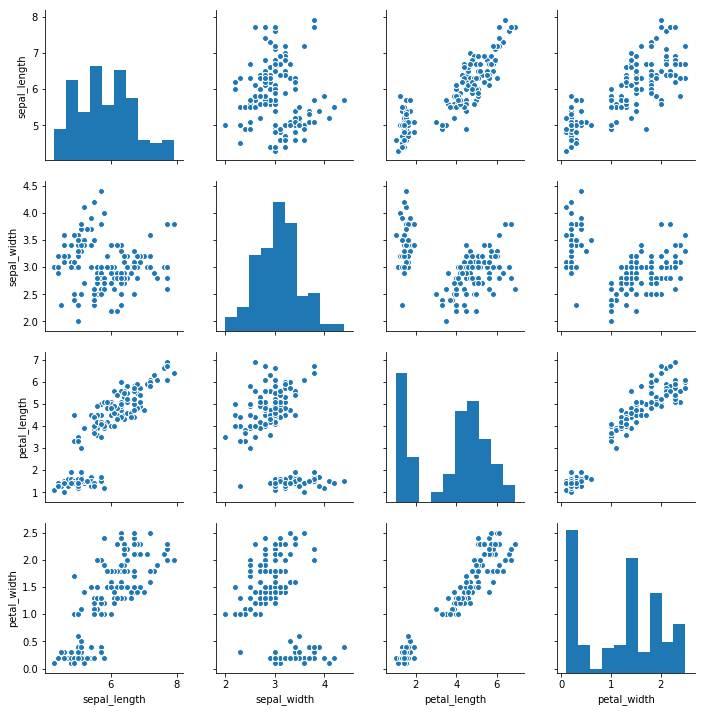

In [4]:
sns.pairplot(data=iris)

In [5]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

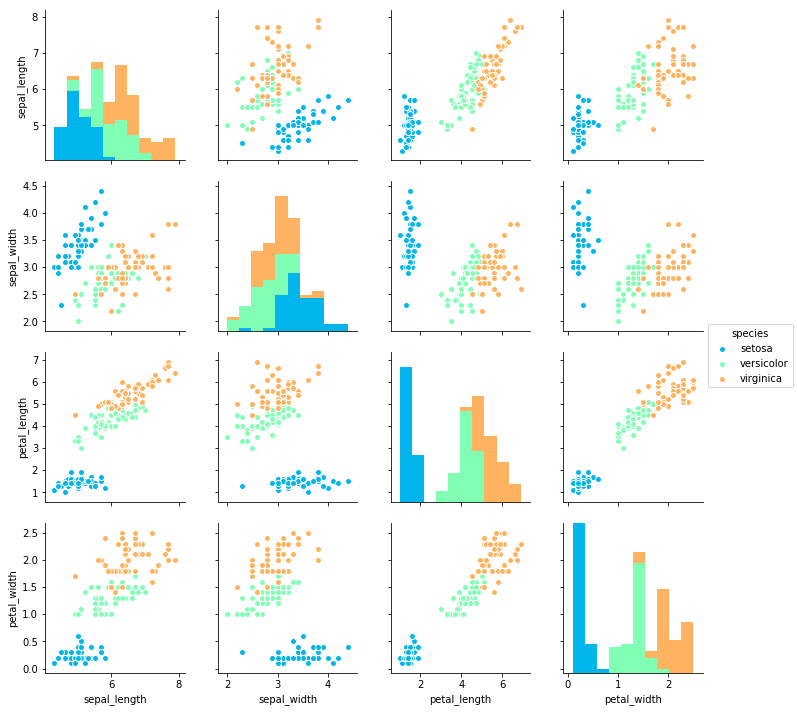

In [6]:
sns.pairplot(iris,hue='species',palette='rainbow')

**Los mecanismos que veremos en este Notebook permiten personalizar este tipo de visualización. Estos métodos son: PairGrid y FacetGrid**

## PairGrid

Pairgrid es una cuadrícula de subplots para presentar gráficos por parejas de las variables del dataset.

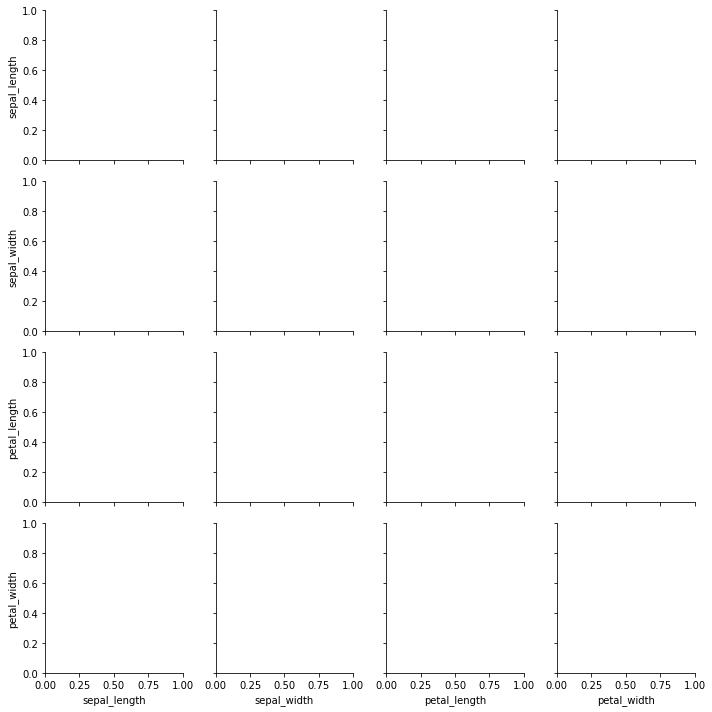

In [6]:
# Solo la cuadrícula
sns.PairGrid(iris)

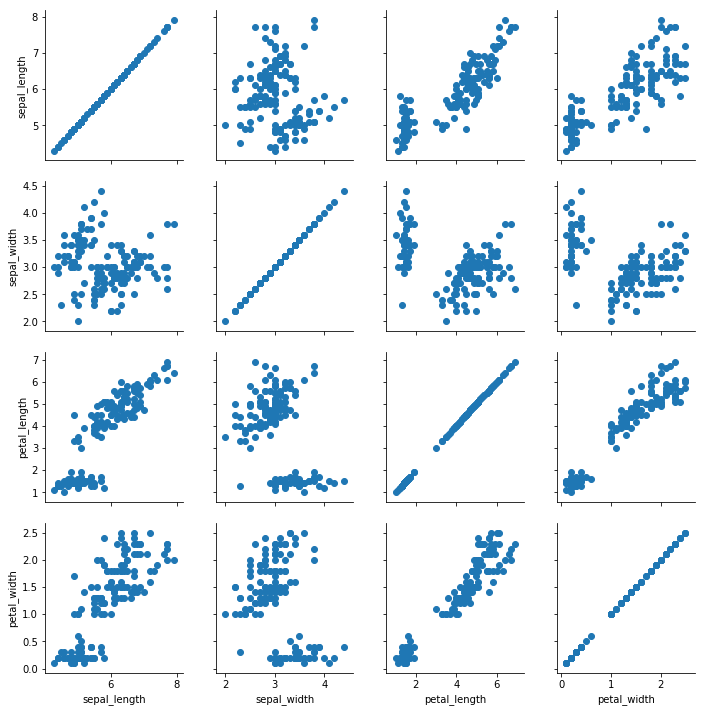

In [7]:
# Se mapea el tipo de gráfico que queremos en las figuras
g = sns.PairGrid(iris)
g.map(plt.scatter)

C:\Users\Estudiante\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


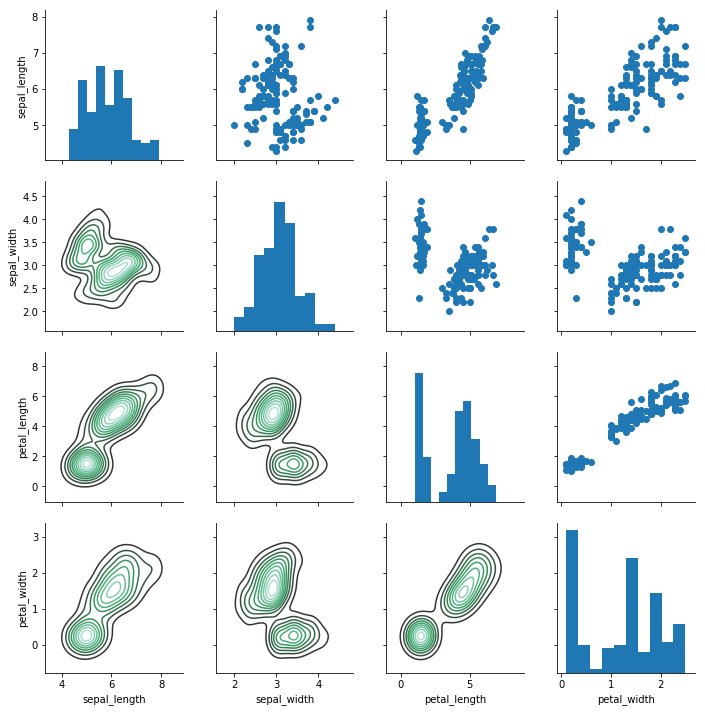

In [8]:
# En este caso, mapeamos un tipo de gráfico para la diagonal del grid (hist), 
# otro para la parte superior de la diagonal (scatter) y otro para la parte inferior (kde)
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## Facet Grid

FacetGrid es la forma general de crear cuadrículas de gráficos basados en una característica:

In [11]:
tips = sns.load_dataset('tips')

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


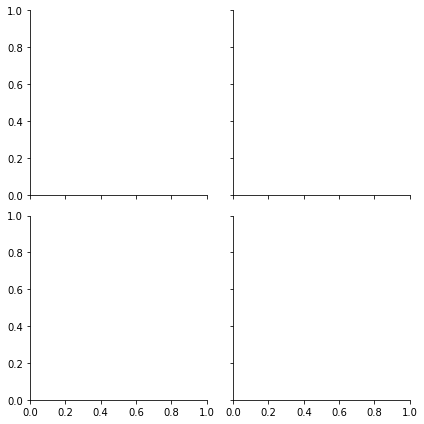

In [13]:
# Solo la cuadrícula
g = sns.FacetGrid(tips, col="time", row="smoker") # tiempo es categórico en este caso, fumador o no vs si era almuerzo o cena

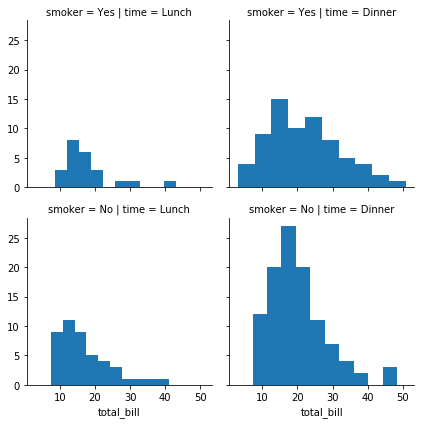

In [14]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill") # eje x total bill, eje y conteo, cuadrante si era fumador o no y si era almuerzo o cena

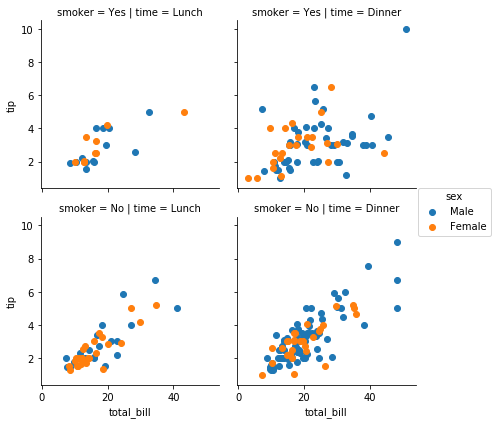

In [14]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Si desea scatter debe poner dos argumentos: las variables
g = g.map(plt.scatter, "total_bill", "tip").add_legend() # el scatterplot pide dos variables en este caso la cuenta y la propina
# gráficos condicionales

## JointGrid

JointGrid es la versión general de las cuadrículas de tipo jointplot().

### jointplot

C:\Users\Estudiante\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


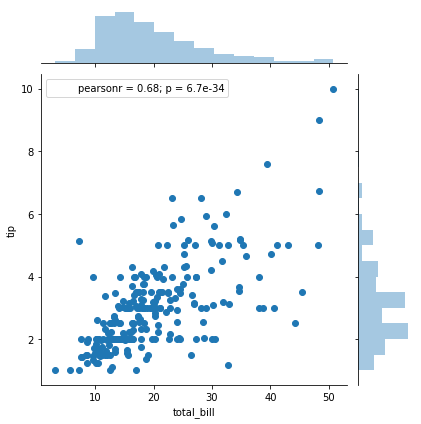

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

### JointGrid

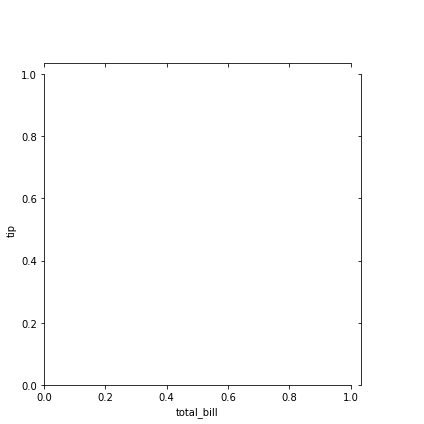

In [16]:
# Crea la cuadrícula
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

C:\Users\Estudiante\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


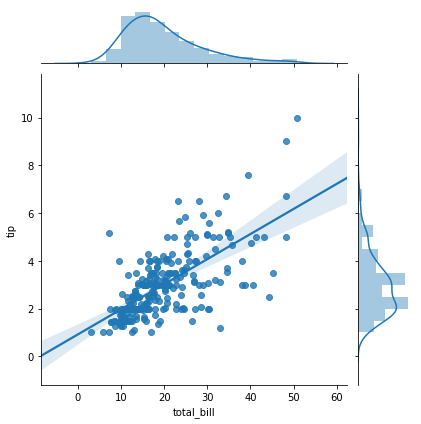

In [17]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips) # en el gráfico interior una regresión lineal y en los externos los
# histogramas con la función de densidad
g = g.plot(sns.regplot, sns.distplot)